# Frequency Modulation Receiver

The first thing you need to do is identify your interfaces.

In [4]:
from scapy.arch.windows import *

def list_interfaces():
    interfaces = get_windows_if_list()
    print("Available network interfaces:")
    for interface in interfaces:
        print(interface)

if __name__ == "__main__":
    list_interfaces()

Available network interfaces:
{'name': 'Ethernet 2', 'index': 9, 'description': 'Sophos TAP Adapter', 'guid': '{4D29C80A-CCA4-4EBF-B2BA-1AC80A09251C}', 'mac': '00:ff:4d:29:c8:0a', 'ipv4_metric': 2, 'ipv6_metric': 2, 'ips': ['fe80::9338:2dcf:4259:d0f9', '169.254.66.23']}
{'name': 'OpenVPN Wintun', 'index': 21, 'description': 'Wintun Userspace Tunnel', 'guid': '{8D343D0E-8C82-4899-89A6-15E4B80678BA}', 'mac': '', 'ipv4_metric': 5, 'ipv6_metric': 5, 'ips': ['fe80::9024:5d43:c8fb:6416', '169.254.211.9']}
{'name': 'OpenVPN TAP-Windows6', 'index': 5, 'description': 'TAP-Windows Adapter V9', 'guid': '{2980B483-1E74-4386-8CC1-47250715CA2A}', 'mac': '00:ff:29:80:b4:83', 'ipv4_metric': 25, 'ipv6_metric': 25, 'ips': ['fe80::c57c:6508:ea75:cba4', '169.254.50.177']}
{'name': 'OpenVPN Data Channel Offload', 'index': 11, 'description': 'OpenVPN Data Channel Offload', 'guid': '{58E08436-E236-4172-BFBD-5F37B7BEBDEF}', 'mac': '', 'ipv4_metric': 25, 'ipv6_metric': 25, 'ips': ['fe80::4025:f585:9e61:3a32', 


{'name': 'vEthernet (WSLCore)-WFP 802.3 MAC Layer LightWeight Filter-0000', 'index': 50, 'description': 'Hyper-V Virtual Ethernet Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000', 'guid': '{69A86E49-0B3D-11EF-BAEB-005056C00008}', 'mac': '00:15:5d:9c:fe:ad', 'ipv4_metric': 0, 'ipv6_metric': 0, 'ips': []}
{'name': 'Local Area Connection* 8-WFP Native MAC Layer LightWeight Filter-0000', 'index': 80, 'description': 'WAN Miniport (IP)-WFP Native MAC Layer LightWeight Filter-0000', 'guid': '{69A8735D-0B3D-11EF-BAEB-005056C00008}', 'mac': '', 'ipv4_metric': 0, 'ipv6_metric': 0, 'ips': []}
{'name': 'Local Area Connection* 8-Fortinet NDIS 6.0 LightWeight Filter-0000', 'index': 81, 'description': 'WAN Miniport (IP)-Fortinet NDIS 6.0 LightWeight Filter-0000', 'guid': '{FD5E221B-C5CC-11EE-BADB-005056C00008}', 'mac': '', 'ipv4_metric': 0, 'ipv6_metric': 0, 'ips': []}
{'name': 'vEthernet (WSL (Hyper-V firewall))-QoS Packet Scheduler-0000', 'index': 46, 'description': 'Hyper-V Virtual Ethernet A

Now we can properly listen on the correct interface to detect the transmission from the send notebook for frequency analysis.

## Ethernet Receiver


Starting IP packet capture...
Starting Ethernet packet capture...
Packet received at 1715026936.1983438
Packet received at 1715026937.2000136
Packet received at 1715026937.7037847
Packet received at 1715026938.204676
Packet received at 1715026939.2067652
Packet received at 1715026940.2120562
Packet received at 1715026941.2165916
Packet received at 1715026941.7192438
Packet received at 1715026942.2221482
Packet received at 1715026943.224684
Packet received at 1715026943.727611
Packet received at 1715026944.2299707
Packet received at 1715026945.2327726
Packet received at 1715026946.2353132
Packet received at 1715026947.2393486
Packet received at 1715026948.2424388
Packet received at 1715026948.7448504
Packet received at 1715026949.7473655
Packet received at 1715026950.250826
Packet received at 1715026950.7528138
Packet received at 1715026951.2557127
Packet received at 1715026952.2582471
Packet received at 1715026952.7602725
Packet received at 1715026953.7626333
Packet received at 1715026

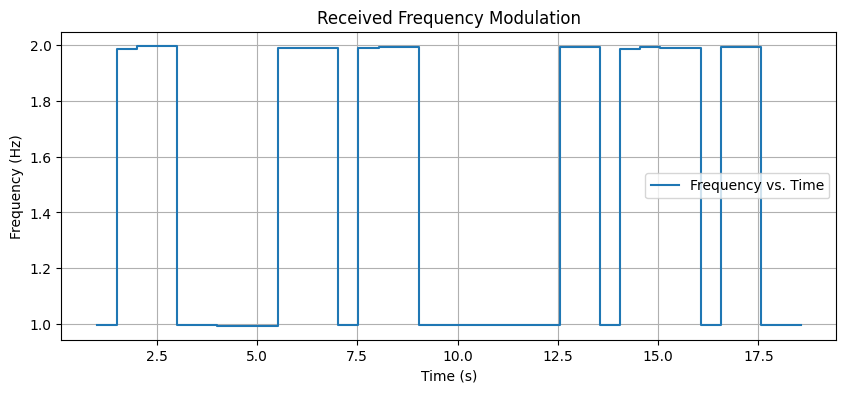

Decoded binary data: 011000110110000101110100
Decoded binary data: 011000110110000101110100
Tranlated to ASCII: {'cat'}


In [1]:
from scapy.all import sniff, Ether
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps
def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    expected_mac = "c4:03:a8:d1:a6:81"
    if packet[Ether].src == expected_mac:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)
    intervals = np.diff(timestamps)
    threshold = (max(intervals) + min(intervals)) / 2
    binary_data1 = ''.join(['0' if interval > threshold else '1' for interval in intervals])
    data_text = binary_to_text(binary_data)
    print(f"Decoded binary data: {binary_data1}")
    print(f"Tranlated to ASCII:", {data_text})


def main():
    # Network configuration

    
    #conf.iface="Wi-Fi"
    
    #conf.iface="Loopback Pseudo-Interface 1"
    print("Starting Ethernet packet capture...")
    sniff(prn=handle_packet, lfilter=lambda x: x.haslayer(Ether), store=False, timeout=60)  # Adjust timeout as necessary

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()

## IP Listen, Plot & Decode
This will listen for raw IP packets sent to the IP address of the listening interface, and plot their frequency distribution, then translate that back into data.
> On the device your are listenting with, ensure that you have no other IP traffic being directed to the interface you are listening on.

Starting IP packet capture...
Packet received at 1715027045.6911535
Packet received at 1715027046.6945565
Packet received at 1715027047.1971374
Packet received at 1715027047.7007215
Packet received at 1715027048.7037404
Packet received at 1715027049.7093718
Packet received at 1715027050.713675
Packet received at 1715027051.2169077
Packet received at 1715027051.7207046
Packet received at 1715027052.7259
Packet received at 1715027053.2289255
Packet received at 1715027053.7319412
Packet received at 1715027054.7353973
Packet received at 1715027055.7387154
Packet received at 1715027056.741868
Packet received at 1715027057.7456217
Packet received at 1715027058.2497768
Packet received at 1715027059.2539246
Packet received at 1715027059.757166
Packet received at 1715027060.2614105
Packet received at 1715027060.7666306
Packet received at 1715027061.7713864
Packet received at 1715027062.2746263
Packet received at 1715027063.2788596
Packet received at 1715027064.2818341


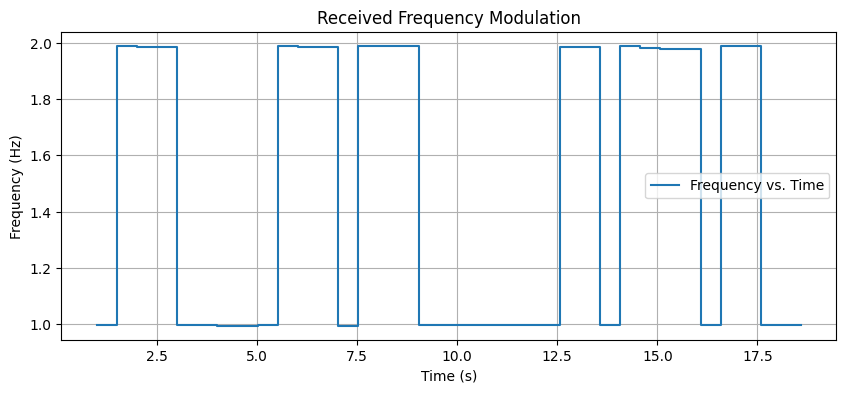

Decoded binary data: 011000110110000101110100
Decoded binary data: 011000110110000101110100
Tranlated to ASCII: {'cat'}


In [3]:
from scapy.all import sniff, IP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1.00, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2.00, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)
    intervals = np.diff(timestamps)
    threshold = (max(intervals) + min(intervals)) / 2
    binary_data1 = ''.join(['0' if interval > threshold else '1' for interval in intervals])
    data_text = binary_to_text(binary_data)
    print(f"Decoded binary data: {binary_data1}")
    print(f"Tranlated to ASCII:", {data_text})
    
def main():
    # Network configuration
    mac_adapter="c4:03:a8:d1:a6:82"
    ip_wifi="172.20.7.186"
    global expected_src_ip
    expected_src_ip = ip_wifi  # Adjust as necessary

    # Start packet sniffing
    print("Starting IP packet capture...")
    
    
    
    #conf.iface="Loopback Pseudo-Interface 1"
    sniff(filter="not tcp and not udp", iface="Wi-Fi", prn=handle_packet, store=False, timeout=30)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()

## ICMP Listen, Plot, & Decode
Use this as a server to listen to the ICMP you are sending, if you want to be very specific, you can generate specific codes of ICMP and only listen to those with the filter. Though this will open up additional detections.

Starting ICMP packet capture...
Packet received at 1714976553.5949032
Packet received at 1714976554.5973775
Packet received at 1714976555.1015785
Packet received at 1714976555.6067395
Packet received at 1714976556.611052
Packet received at 1714976557.616677
Packet received at 1714976558.6187484
Packet received at 1714976559.128816
Packet received at 1714976559.6352563
Packet received at 1714976560.6382444
Packet received at 1714976561.1429906
Packet received at 1714976561.6465719
Packet received at 1714976562.65167
Packet received at 1714976563.6557426
Packet received at 1714976564.6627374
Packet received at 1714976565.6645322
Packet received at 1714976566.1700106
Packet received at 1714976567.1755948
Packet received at 1714976567.679669
Packet received at 1714976568.185823
Packet received at 1714976568.6904032
Packet received at 1714976569.6955452
Packet received at 1714976570.199495
Packet received at 1714976571.2048023
Packet received at 1714976572.2103643


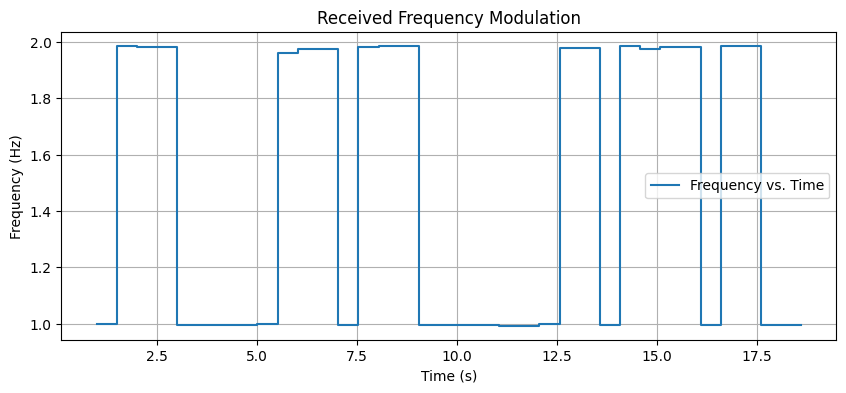

Decoded binary data: 011000110110000101110100
Decoded binary data: 011000110110000101110100
Tranlated to ASCII: {'cat'}


In [1]:
from scapy.all import sniff, IP, ICMP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(ICMP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1.00, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2.00, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)
    intervals = np.diff(timestamps)
    threshold = (max(intervals) + min(intervals)) / 2
    binary_data1 = ''.join(['0' if interval > threshold else '1' for interval in intervals])
    data_text = binary_to_text(binary_data)
    print(f"Decoded binary data: {binary_data1}")
    print(f"Tranlated to ASCII:", {data_text})
    
def main():
    # Network configuration
    mac_adapter="c4:03:a8:d1:a6:82"
    ip_wifi="172.20.7.186"
    global expected_src_ip
    expected_src_ip = ip_wifi  # Adjust as necessary

    # Start packet sniffing
    print("Starting ICMP packet capture...")
    
    #conf.iface="Loopback Pseudo-Interface 1"
    sniff(filter="icmp",iface="Wi-Fi", prn=handle_packet, store=False, timeout=30)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()




## Listen for UDP Port & Decode
This code runs as the server listening on a specific UDP port, and translates it back into the original binary.


Starting UDP packet capture...
Packet received at 1714977353.5741806
Packet received at 1714977354.576976
Packet received at 1714977355.0797071
Packet received at 1714977355.5826848
Packet received at 1714977356.585445
Packet received at 1714977357.5895376
Packet received at 1714977358.5932405
Packet received at 1714977359.0988922
Packet received at 1714977359.5996163
Packet received at 1714977360.6040275
Packet received at 1714977361.107718
Packet received at 1714977361.609867
Packet received at 1714977362.6127145
Packet received at 1714977363.6229646
Packet received at 1714977364.6251292
Packet received at 1714977365.6341813
Packet received at 1714977366.1373353
Packet received at 1714977367.1385758
Packet received at 1714977367.6455584
Packet received at 1714977368.1500945
Packet received at 1714977368.6511586
Packet received at 1714977369.6558754
Packet received at 1714977370.1595533
Packet received at 1714977371.1634948
Packet received at 1714977372.167406


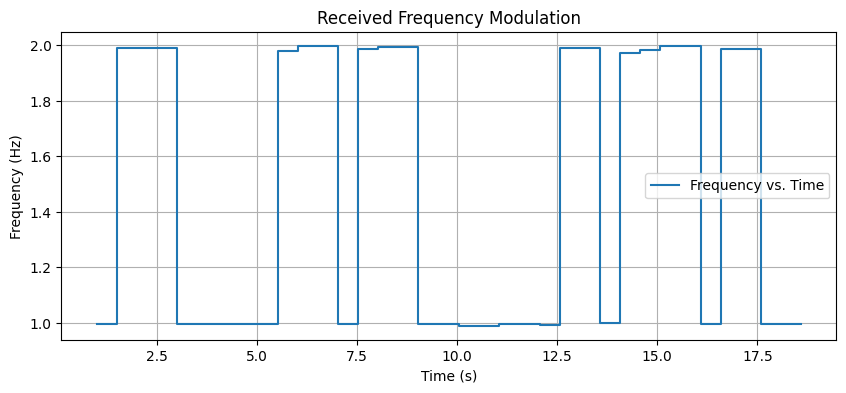

Decoded binary data: 011000110110000101110100
Decoded binary data: 011000110110000101110100
Tranlated to ASCII: {'cat'}


In [4]:
from scapy.all import sniff, IP, UDP
import numpy as np
import matplotlib.pyplot as plt
import time
mac_adapter="c4:03:a8:d1:a6:82"
ip_wifi="172.20.7.186"

def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(UDP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1.00, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2.00, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)
    intervals = np.diff(timestamps)
    threshold = (max(intervals) + min(intervals)) / 2
    binary_data1 = ''.join(['0' if interval > threshold else '1' for interval in intervals])
    data_text = binary_to_text(binary_data)
    print(f"Decoded binary data: {binary_data1}")
    print(f"Tranlated to ASCII:", {data_text})

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = ip_wifi  # Adjust as necessary
    listen_port = 666  # UDP port to listen on

    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter=f"udp and port {listen_port}", prn=handle_packet, store=False, timeout=30)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()

## TCP Attempt Potentially Bi-Directional - Future

In [17]:
from scapy.all import sniff, IP, TCP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(TCP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"TCP packet received at {current_time}: {packet[TCP].flags}")

def plot_and_decode_waveform(timestamps):
    """ Plot the waveform from packet intervals and decode the binary data. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals
    
    # Plotting the frequency modulation
    plt.figure(figsize=(10, 4))
    plt.step(times[:-1], frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1, atol=0.1):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2, atol=0.1):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = "192.168.1.155"  # Adjust as necessary
    listen_port = 12345  # TCP port to listen on

    # Start packet sniffing
    print("Starting TCP packet capture...")
    sniff(filter=f"tcp and port {listen_port}", prn=handle_packet, store=False, timeout=10)  # Adjust timeout as needed

    # After capture, process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_and_decode_waveform(timestamps)

if __name__ == "__main__":
    main()

Starting TCP packet capture...
TCP packet received at 1714622462.4854963: S
